<a href="https://colab.research.google.com/drive/1QBnTv9zlgbpAvAQP0iZC2CI5Y543oxsg?usp=sharing"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

**Dataset Used:**

Fashion MNIST

https://www.kaggle.com/datasets/zalando-research/fashionmnist

**Note:** The dataset provided does not contain original images; instead, it has undergone internal conversion where images were translated into pixel values and then compiled into a CSV file. Please refer to the shared link for further details on how this dataset can still be considered an image dataset.

In [2]:
import pandas as pd
import zipfile
import os

# File path for the uploaded zip file
zip_file_path = '/content/drive/MyDrive/Datasets/fashion-mnist_test.csv.zip'

# Unzipping the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall("/content/drive/MyDrive/Datasets/fashion-mnist")

# Checking the extracted files
extracted_files = os.listdir("/content/drive/MyDrive/Datasets/fashion-mnist")
extracted_files

['fashion-mnist_test.csv']

In [3]:
# Load the dataset
file_path = "/content/drive/MyDrive/Datasets/fashion-mnist/fashion-mnist_test.csv"
fashion_mnist_data = pd.read_csv(file_path)

# Display the first few rows of the dataset
fashion_mnist_data.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


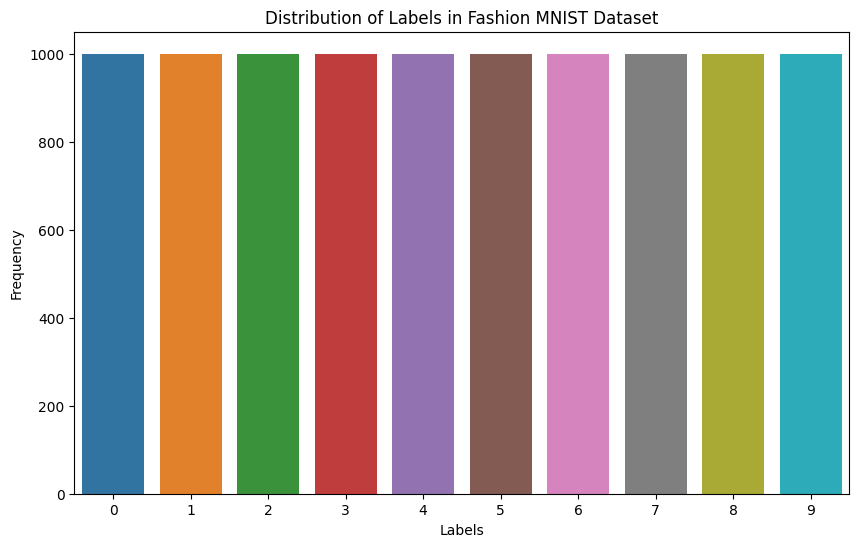

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,9.000000,2.000000,45.000000,218.000000,185.000000,227.000000,223.000000,247.000000,218.000000,244.000000,...,254.000000,252.000000,255.000000,255.000000,255.000000,255.000000,240.000000,225.000000,205.000000,107.00000
mean,4.500000,0.000400,0.010300,0.052100,0.077000,0.208600,0.349200,0.826700,2.321200,5.457800,...,34.320800,23.071900,16.432000,17.870600,22.860000,17.790200,8.353500,2.541600,0.629500,0.06560
std,2.872425,0.024493,0.525187,2.494315,2.208882,4.669183,5.657849,8.591731,15.031508,23.359019,...,57.888679,49.049749,42.159665,44.140552,51.706601,45.128107,28.765769,16.417363,7.462533,1.93403


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Checking the distribution of labels
label_distribution = fashion_mnist_data['label'].value_counts()

# Plotting the label distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=label_distribution.index, y=label_distribution.values)
plt.title('Distribution of Labels in Fashion MNIST Dataset')
plt.xlabel('Labels')
plt.ylabel('Frequency')
plt.show()

# Checking basic statistics for pixel values
pixel_stats = fashion_mnist_data.describe().loc[['min', 'max', 'mean', 'std']]
pixel_stats.head()

In [5]:
# Checking for missing values
missing_values = fashion_mnist_data.isnull().sum().sum()
missing_values_info = "No missing values found." if missing_values == 0 else f"Found {missing_values} missing values."
missing_values_info

'No missing values found.'

In [6]:
# Separating features and labels
features = fashion_mnist_data.drop('label', axis=1)
labels = fashion_mnist_data['label']

# Normalizing the pixel values to be between 0 and 1
features_normalized = features / 255.0

# Checking the first few rows of the normalized features
features_normalized.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [7]:
from sklearn.cluster import KMeans
import numpy as np

# To ensure efficient processing, we use a sample of the data
sampled_data = features_normalized.sample(n=5000, random_state=42)

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sampled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

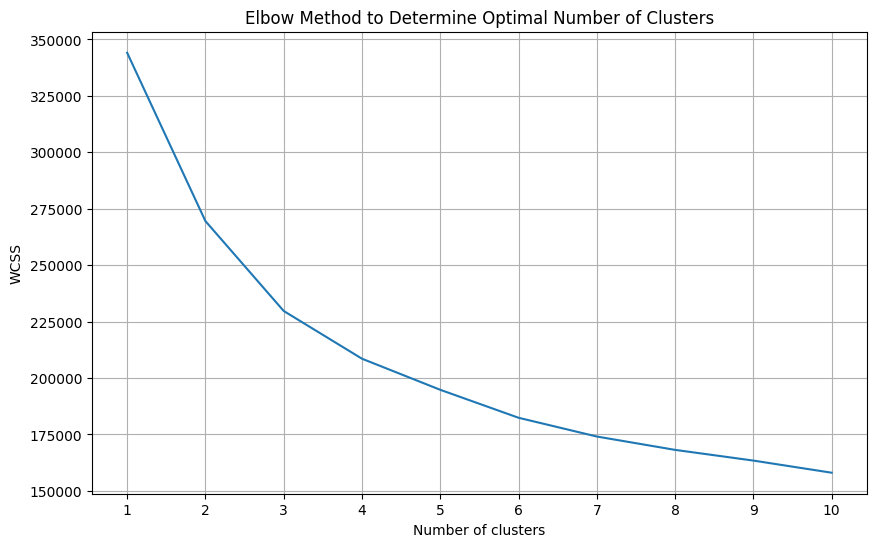

In [8]:
# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()

In [9]:
from sklearn.cluster import KMeans
import numpy as np

# To ensure efficient processing, we use a sample of the data
sampled_data = features_normalized.sample(n=5000, random_state=42)

# Using the Elbow Method to find the optimal number of clusters
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(sampled_data)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

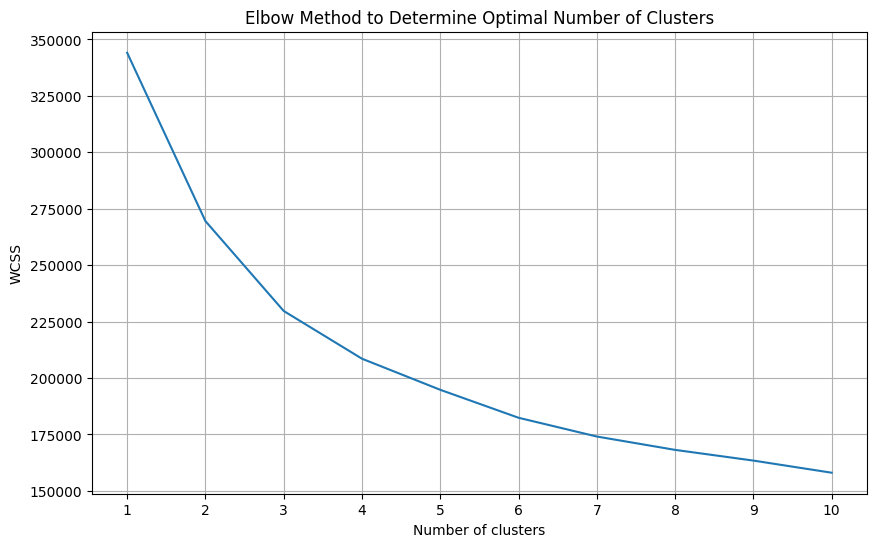

In [10]:
# Plotting the results of the Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method to Determine Optimal Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.xticks(np.arange(1, 11, step=1))
plt.grid(True)
plt.show()

In [11]:
# Applying K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(sampled_data)

# Adding cluster labels to the sampled data for visualization
sampled_data_with_clusters = sampled_data.copy()
sampled_data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
sampled_data_with_clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Cluster
6252,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.007843,0.000000,...,0.000000,0.000000,0.384314,0.27451,0.227451,0.000000,0.0,0.0,0.0,1
4684,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0
1731,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.298039,...,0.000000,0.101961,0.117647,0.00000,0.000000,0.011765,0.0,0.0,0.0,1
4742,0.0,0.0,0.0,0.003922,0.003922,0.0,0.0,0.0,0.000000,0.211765,...,0.737255,0.756863,0.109804,0.00000,0.019608,0.003922,0.0,0.0,0.0,3
4521,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0


In [12]:
import pandas as pd
from sklearn.cluster import KMeans

# Re-importing the data due to code execution state reset
features = fashion_mnist_data.drop('label', axis=1)
features_normalized = features / 255.0

# Sampling the data again
sampled_data = features_normalized.sample(n=5000, random_state=42)

# Applying K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(sampled_data)

# Adding cluster labels to the sampled data for visualization
sampled_data_with_clusters = sampled_data.copy()
sampled_data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
sampled_data_with_clusters.head()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Cluster
6252,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.007843,0.000000,...,0.000000,0.000000,0.384314,0.27451,0.227451,0.000000,0.0,0.0,0.0,1
4684,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0
1731,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.298039,...,0.000000,0.101961,0.117647,0.00000,0.000000,0.011765,0.0,0.0,0.0,1
4742,0.0,0.0,0.0,0.003922,0.003922,0.0,0.0,0.0,0.000000,0.211765,...,0.737255,0.756863,0.109804,0.00000,0.019608,0.003922,0.0,0.0,0.0,3
4521,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0


In [13]:
# Applying K-Means with 4 clusters
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster_labels = kmeans.fit_predict(sampled_data)

# Adding cluster labels to the sampled data for visualization
sampled_data_with_clusters = sampled_data.copy()
sampled_data_with_clusters['Cluster'] = cluster_labels

# Displaying the first few rows with cluster labels
sampled_data_with_clusters.head()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,Cluster
6252,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.007843,0.000000,...,0.000000,0.000000,0.384314,0.27451,0.227451,0.000000,0.0,0.0,0.0,1
4684,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0
1731,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.298039,...,0.000000,0.101961,0.117647,0.00000,0.000000,0.011765,0.0,0.0,0.0,1
4742,0.0,0.0,0.0,0.003922,0.003922,0.0,0.0,0.0,0.000000,0.211765,...,0.737255,0.756863,0.109804,0.00000,0.019608,0.003922,0.0,0.0,0.0,3
4521,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0


In [14]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sampled_data)

# Creating a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = cluster_labels

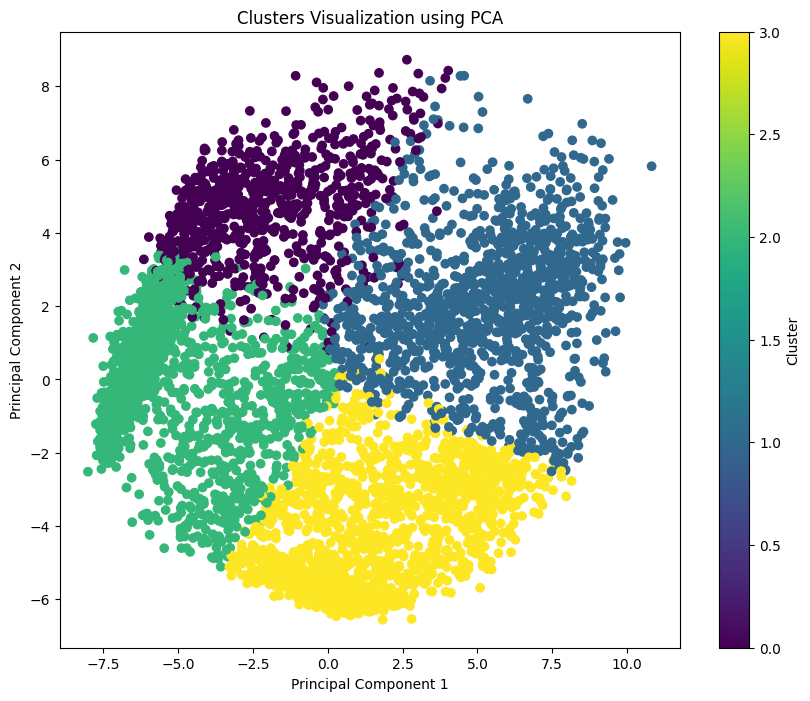

In [15]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [16]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Applying PCA to reduce the data to 2 dimensions for visualization
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(sampled_data)

# Creating a DataFrame for the reduced data
reduced_df = pd.DataFrame(reduced_data, columns=['PC1', 'PC2'])
reduced_df['Cluster'] = cluster_labels

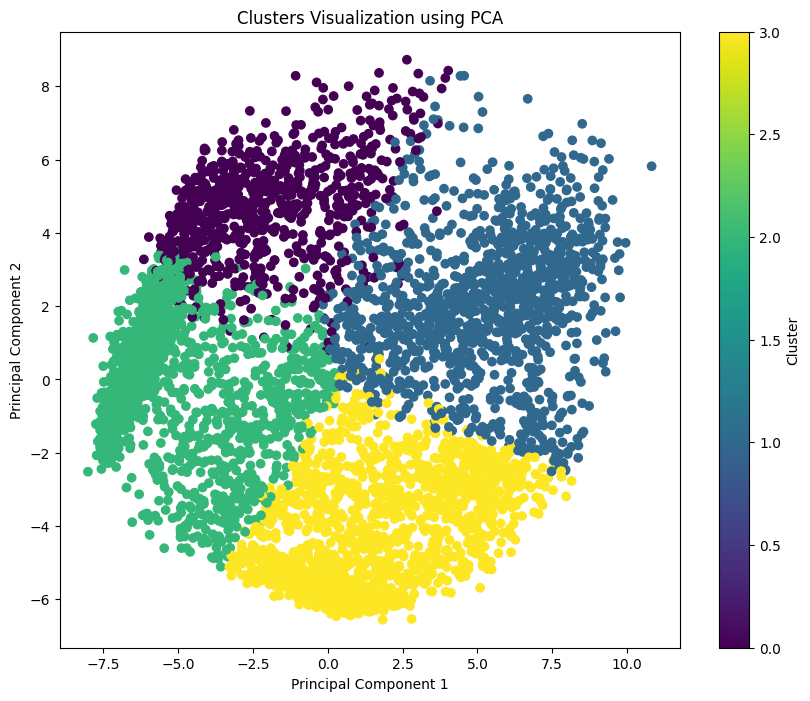

In [17]:
# Plotting the clusters
plt.figure(figsize=(10, 8))
plt.scatter(reduced_df['PC1'], reduced_df['PC2'], c=reduced_df['Cluster'], cmap='viridis', marker='o')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='Cluster')
plt.show()

In [19]:
from scipy.spatial.distance import cdist
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans

# Assuming you have your dataset loaded as 'sampled_data' and normalized
# Apply K-Means clustering
kmeans = KMeans(n_clusters=4, random_state=42)
cluster_labels = kmeans.fit_predict(sampled_data)

# Calculate the distance of each point from its cluster centroid
centroids = kmeans.cluster_centers_
distances = cdist(sampled_data, centroids, 'euclidean')

# Find the minimum distance to the centroid for each point
min_distances = np.min(distances, axis=1)

# Setting a threshold for outliers, e.g., 95th percentile of the distances
threshold = np.percentile(min_distances, 95)

# Identifying outliers
outliers = sampled_data[min_distances > threshold]

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


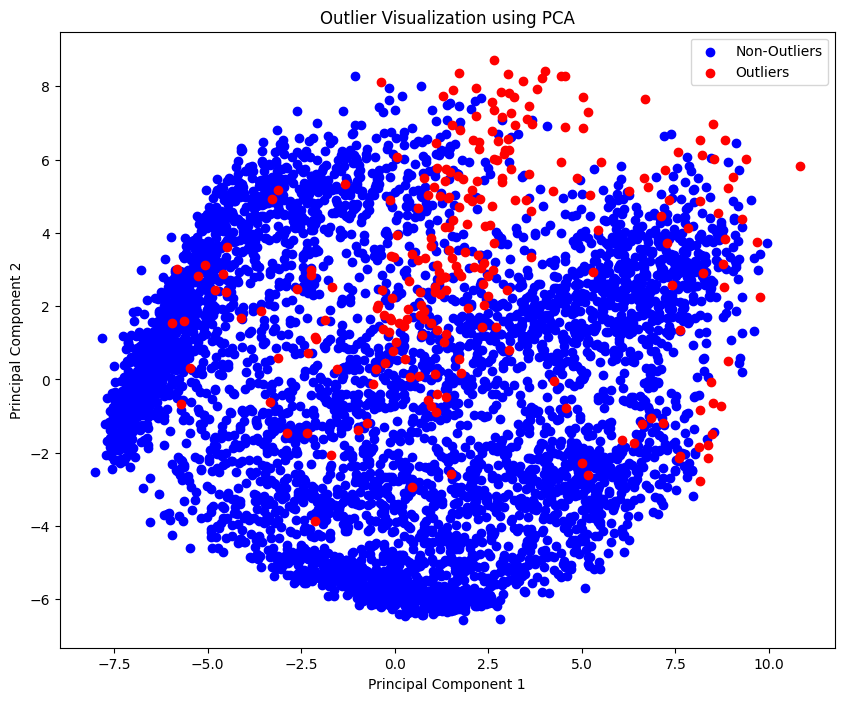

In [20]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA for dimensionality reduction
pca = PCA(n_components=2)
sampled_data_reduced = pca.fit_transform(sampled_data)

# Mark outliers and non-outliers
outlier_flags = min_distances > threshold
non_outliers = sampled_data_reduced[~outlier_flags]
outliers_reduced = sampled_data_reduced[outlier_flags]

# Plotting
plt.figure(figsize=(10, 8))
plt.scatter(non_outliers[:, 0], non_outliers[:, 1], color='blue', label='Non-Outliers')
plt.scatter(outliers_reduced[:, 0], outliers_reduced[:, 1], color='red', label='Outliers')
plt.title('Outlier Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()